In [60]:
import pandas as pd
import numpy as np
import os, sys, re
import matplotlib.pyplot as plt
import subprocess

In [9]:
summary_paths = '/lus/grand/projects/TFXcan/imlab/users/temi/projects/TFXcan/misc/compare_vcfs'

In [10]:
chromosomes = [f'chr{i}' for i in range(1, 23)]
chromosomes

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22']

In [37]:
snps_dict = {}
for chrom in chromosomes:
    with open(f'{summary_paths}/summary_{chrom}.stats', 'r') as f:
        #print(f'Processing {chrom}')
        data = f.read()
        result = re.finditer(r'^SN.*(\d).*number\sof\sSNPs:\s+(\d{1,})', data, re.MULTILINE)
        m = []
        for match in result:
            m.append(match.groups()[1])
        snps_dict[chrom] = m
snps_dict

{'chr1': ['5379687', '3028', '415358'],
 'chr2': ['5901088', '3065', '455727'],
 'chr3': ['4891708', '2447', '388828'],
 'chr4': ['4721371', '2536', '399293'],
 'chr5': ['4444996', '2067', '343378'],
 'chr6': ['4178084', '3095', '361670'],
 'chr7': ['3903208', '3010', '319723'],
 'chr8': ['3860927', '2354', '301450'],
 'chr9': ['2944363', '1865', '234636'],
 'chr10': ['3351444', '2293', '280853'],
 'chr11': ['3368170', '2478', '273897'],
 'chr12': ['3237314', '1990', '263004'],
 'chr13': ['2369969', '1466', '205118'],
 'chr14': ['2205887', '1474', '177238'],
 'chr15': ['1999136', '1586', '154796'],
 'chr16': ['2243863', '1940', '166668'],
 'chr17': ['1926917', '3961', '139767'],
 'chr18': ['1889706', '993', '157647'],
 'chr19': ['1504984', '1330', '120714'],
 'chr20': ['1583469', '913', '122973'],
 'chr21': ['899236', '1834', '77363'],
 'chr22': ['921224', '921', '72656']}

In [53]:
dt = pd.DataFrame.from_dict(snps_dict, orient='index', columns=['GEUVADIS', 'shared', 'CWAS'])
dt.GEUVADIS = dt.GEUVADIS.astype(int)
dt.shared = dt.shared.astype(int)
dt.CWAS = dt.CWAS.astype(int)
dt.head()

,GEUVADIS,shared,CWAS
chr1,5379687,3028,415358
chr2,5901088,3065,455727
chr3,4891708,2447,388828
chr4,4721371,2536,399293
chr5,4444996,2067,343378


<Figure size 640x480 with 0 Axes>

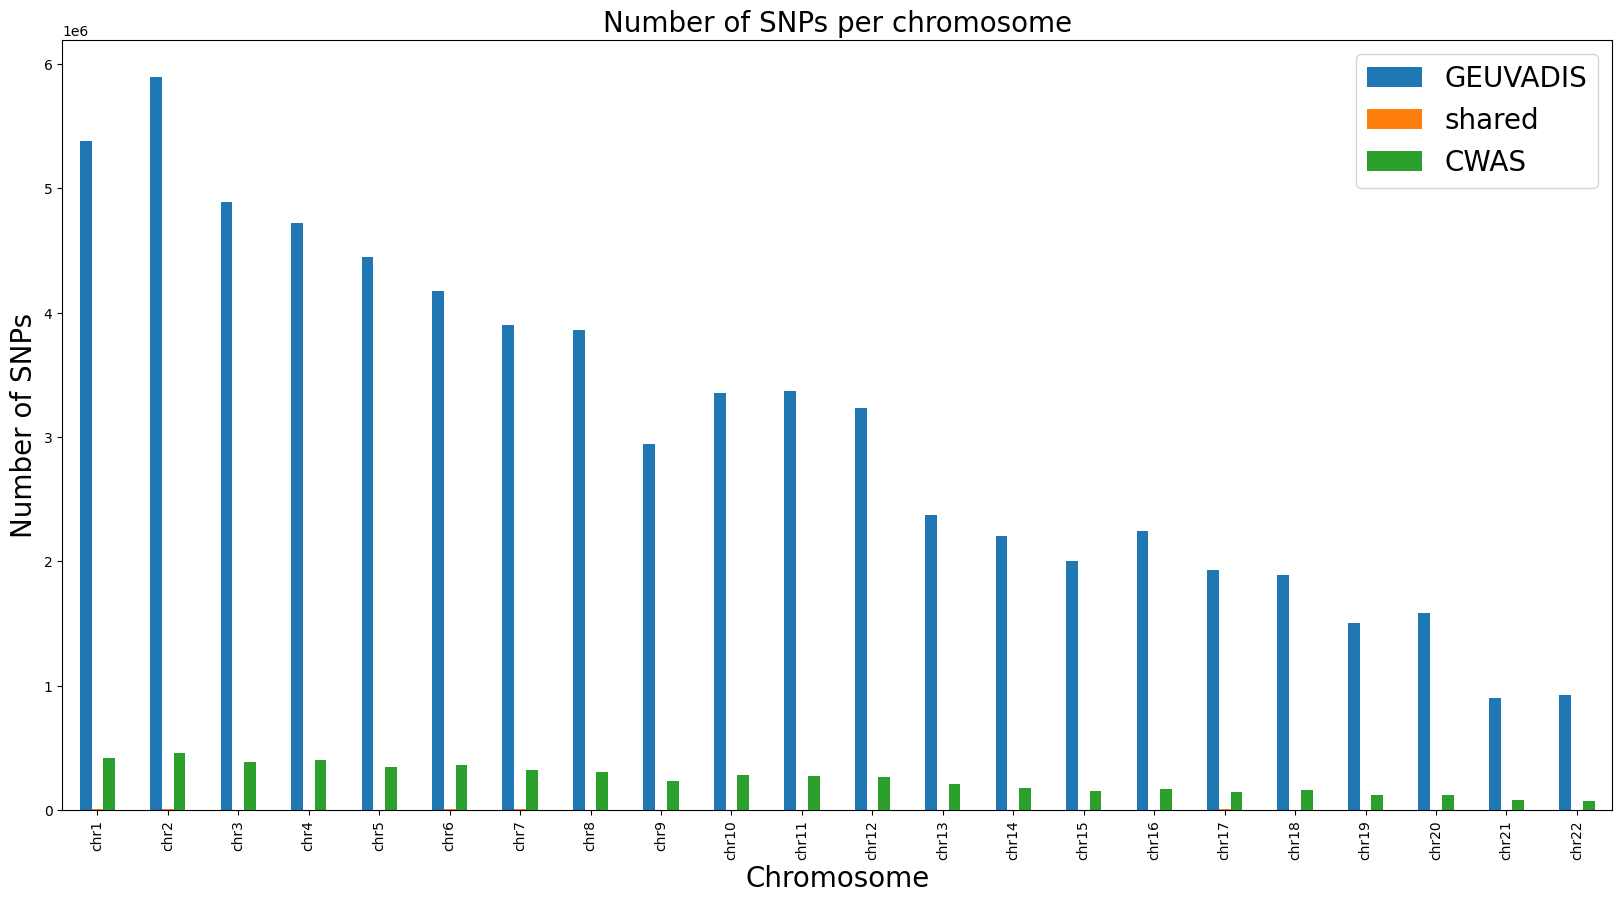

In [70]:
fig = plt.figure()

bplot = dt.plot(kind='bar', figsize=(20, 10), title='Number of SNPs per chromosome')
plt.title('Number of SNPs per chromosome', size=20)
bplot.set_xlabel('Chromosome', size=20)
bplot.set_ylabel('Number of SNPs', size=20)
bplot.legend(fontsize=20)